In [61]:
pip install tensorflow

In [97]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
import pandas as pd

In [67]:
df=pd.read_csv('Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [68]:
df.drop(['CustomerId','RowNumber','Surname'], axis='columns', inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [73]:
# df.isna().sum()
# df[df.Geography==' ']

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [76]:
tenure_churn_no=df[df.Exited==0].Balance
tenure_churn_yes=df[df.Exited==1].Balance

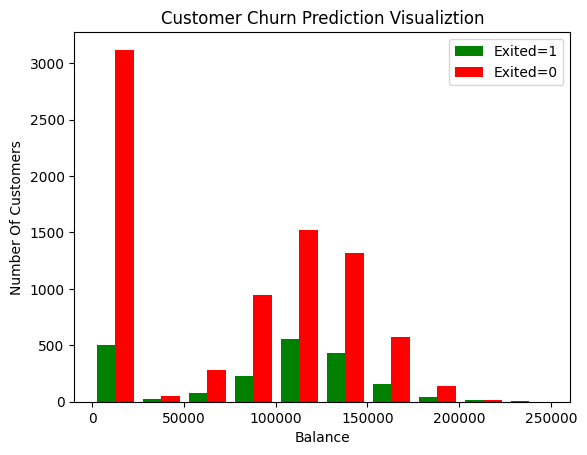

In [79]:
plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Exited=1','Exited=0'])
plt.legend()

In [80]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')


print_unique_col_values(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [81]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [82]:
df['Gender'].unique()

array([1, 0])

In [83]:
df1=pd.get_dummies(df,columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [84]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7196,561,1,35,5,0.00,2,1,0,59981.62,0,True,False,False
5160,510,0,44,6,0.00,2,1,1,175518.31,0,True,False,False
2724,453,1,38,8,120623.21,1,1,0,129697.99,0,False,True,False
8622,706,0,36,9,58571.18,2,1,0,40774.01,0,False,True,False
6347,637,0,35,8,147127.81,2,1,1,84760.70,0,False,True,False


In [98]:
for col in df1:
    if df1[col].dtypes=='bool':
        df1[col].replace({True:1,False:0},inplace=True)

for col in df1:
      print(f'{col} : {df1[col].unique()}')

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [99]:
df1.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [88]:
df1.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,0,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,0,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,1,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,0,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,0,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [89]:
cols_to_scale=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [90]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5045,0.810,1,0.148649,0.3,0.000000,3,1,0,0.023614,0,1,0,0
5667,0.644,1,0.216216,0.8,0.000000,2,1,1,0.081176,0,1,0,0
7313,0.674,1,0.243243,0.4,0.387241,1,0,1,0.315898,0,1,0,0
998,0.922,1,0.135135,0.4,0.668554,2,1,1,0.049464,0,0,1,0
7937,0.640,0,0.243243,0.3,0.000000,1,1,0,0.703780,1,1,0,0


In [100]:
x=df1.drop('Exited',axis='columns')
y=df1['Exited']

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
len(x_train.columns)

12

In [107]:
import tensorflow as tf
from tensorflow import keras
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(12,),activation='relu'),
    # keras.layers.Dense(15,activation='relu'),
    # keras.layers.Dense(10,activation='relu'),
    # keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

(8000, 12)
(2000, 12)
(8000,)
(2000,)
Epoch 1/100
250/250 [==============================] - 3s 4ms/step - loss: 0.5127 - accuracy: 0.7847
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4642 - accuracy: 0.8027
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4528 - accuracy: 0.8046
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8087
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8163
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8159
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8174
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8181
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8202
Epoch 10/100
250/250 [==============================]

In [108]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8525


[0.35300350189208984, 0.8525000214576721]

In [109]:
yp=model.predict(x_test)
yp[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.03725543],
       [0.05774615],
       [0.05297791],
       [0.07358592],
       [0.06866527]], dtype=float32)

In [110]:
y_test[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [111]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [112]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [113]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.43      0.54       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(45.722222222222214, 0.5, 'Truth')

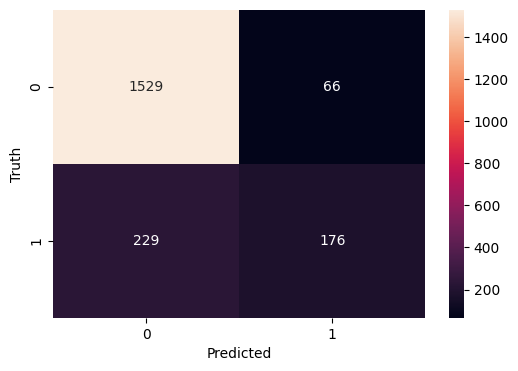

In [114]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(6,4))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')